# Project: Investigating the "TMDb Movie Data" Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have decided to do an analysis on the data set entitled "TMDb Movie Data." This dataset includes information from The Movie Database about 10,000 movies. The data includes things such as user rating, cast, genre, revenue, and more. Let's explore the data to get accustomed to it, clean it up, and then explore it some more! After that, we will do an analysis on the data. I am going to look at all of the different genres and see how they compare in average score and popularity. After that, I will see which correlates with adjusted revenue better: popularity or score.

In [3]:
# I added the import statements here I plan to use.

import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt


# I added the magic word to plot graphs inline with the notebook

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [4]:
# I loaded the data and printed a few lines to look at it and see how it is arranged.

movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()




,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#Here I take a look at the data types of the data. I wonder if those "object" data types are actually strings. I decide that
#the data types look reasonable. I am planning on searching the strings for certain genre types when analyzing the data.

movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning

I thought that the data seemed clean at first. However, I realized that some of the string objects had null values, which
I found out registers as a float and can mess up the process I use to search for a subset in a string. Therefore, I need to
clean the data of null values.

In [6]:
#This cell looks at how many non-null values there are in certain columns. There are enough that the data is still quite useful!
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#This cleans the genres, popularity, and vote_average of null values. I also clean the revenue column of null values for later.

movie_df = movie_df.dropna(subset=['genres'])
movie_df = movie_df.dropna(subset=['popularity'])
movie_df = movie_df.dropna(subset=['vote_average'])
movie_df = movie_df.dropna(subset=['revenue_adj'])

In [8]:
#I am going to look at numeric columns and get rid of the rows with a value of zero.

movie_df= movie_df[movie_df['popularity'] != 0]
movie_df= movie_df[movie_df['revenue_adj'] != 0]
movie_df= movie_df[movie_df['vote_average'] != 0]
movie_df= movie_df[movie_df['popularity'] != 0]
movie_df= movie_df[movie_df['revenue'] != 0]
movie_df= movie_df[movie_df['budget'] != 0]
movie_df= movie_df[movie_df['vote_count'] != 0]

In [9]:
#Now I am going to look for duplicates. I don't see any...

movie_df.duplicated('imdb_id')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10690    False
10691    False
10692    False
10716    False
10724    False
10725    False
10727    False
10728    False
10755    False
10756    False
10757    False
10758    False
10759    False
10760    False
10762    False
10770    False
10771    False
10775    False
10777    False
10778    False
10779    False
10780    False
10788    False
10791    False
10793    False
10822    False
10828    False
10829    False
10835    False
10848    False
Length: 3855, dtype: bool

In [10]:
#Once again, checking for duplicates, and I don't think there are any?

movie_df.duplicated().sum()

1

<a id='eda'></a>
## Exploratory Data Analysis
### How do Action Movies, Crime Movies, and Fantasy Movies Compare in Popularity and Score

In [11]:
#This cell is going to calculate the average popularity of action, crime, fantasy, thriller, adventure and science
#fiction movies. 

action_popularity = movie_df[movie_df['genres'].str.contains('Action')].popularity.mean()
crime_popularity = movie_df[movie_df['genres'].str.contains('Crime')].popularity.mean()
fantasy_popularity = movie_df[movie_df['genres'].str.contains('Fantasy')].popularity.mean()
adventure_popularity = movie_df[movie_df['genres'].str.contains('Adventure')].popularity.mean()
thriller_popularity = movie_df[movie_df['genres'].str.contains('Thriller')].popularity.mean()
science_fiction_popularity = movie_df[movie_df['genres'].str.contains('Science Fiction')].popularity.mean()

#Now I am going to calculate the average score of action, crime, fantasy, thriller, adventure and science
#fiction movies. 

action_score = movie_df[movie_df['genres'].str.contains('Action')].vote_average.mean()
crime_score = movie_df[movie_df['genres'].str.contains('Crime')].vote_average.mean()
fantasy_score = movie_df[movie_df['genres'].str.contains('Fantasy')].vote_average.mean()
adventure_score = movie_df[movie_df['genres'].str.contains('Adventure')].vote_average.mean()
thriller_score = movie_df[movie_df['genres'].str.contains('Thriller')].vote_average.mean()
science_fiction_score = movie_df[movie_df['genres'].str.contains('Science Fiction')].vote_average.mean()
        

In [12]:
#In this cell I am going to round all of the data to two decimal places. Then I am going to set up one panda series for
#the popularity data, and one panda series for the score data. These are going to be used later for the bar graphs.

action_popularity = round(action_popularity,2)
crime_popularity = round(crime_popularity,2)
fantasy_popularity = round(fantasy_popularity,2)
adventure_popularity = round(adventure_popularity,2)
thriller_popularity = round(thriller_popularity,2)
science_fiction_popularity = round(science_fiction_popularity,2)

action_score = round(action_score,2)
crime_score = round(crime_score,2)
fantasy_score = round(fantasy_score,2)
adventure_score = round(adventure_score,2)
thriller_score = round(thriller_score,2)
science_fiction_score = round(science_fiction_score,2)

#Setting up the panda series here:

DataPopularity = pd.Series([action_popularity, crime_popularity, fantasy_popularity, adventure_popularity, thriller_popularity, science_fiction_popularity], index=['Action', 'Crime', 'Fantasy', 'Adventure', 'Thriller', 'Science Fiction'])
DataScore = pd.Series([action_score, crime_score, fantasy_score, adventure_score, thriller_score, science_fiction_score], index=['Action', 'Crime', 'Fantasy', 'Adventure', 'Thriller', 'Science Fiction'])

Text(0.5,0,'Scores')

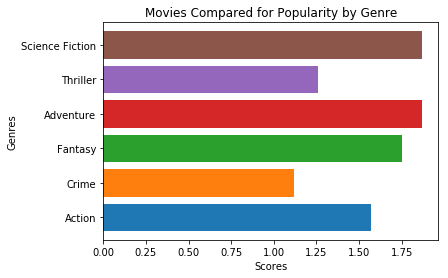

In [15]:
#In this cell I am going to produce a bar graph showing the popularity data for each genre.
DataPopularity.plot.barh(title='Movies Compared for Popularity by Genre', width=.8)
plt.ylabel('Genres')
plt.xlabel('Scores')

Text(0.5,0,'Scores')

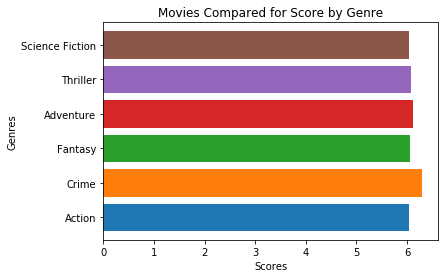

In [14]:
#In this cell, I am going to produce a bar graph showing the score data for each genre.
DataScore.plot.barh(title='Movies Compared for Score by Genre', width=.8)

plt.ylabel('Genres')
plt.xlabel('Scores')

Now we need to look at some boxplots of the variables to see how they are distributed! In particular, popularity and score.

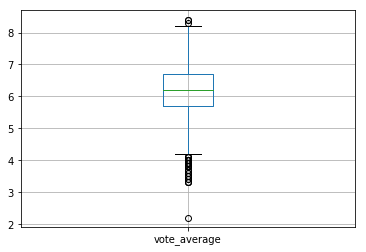

In [23]:
movie_df.boxplot(column=['vote_average'])

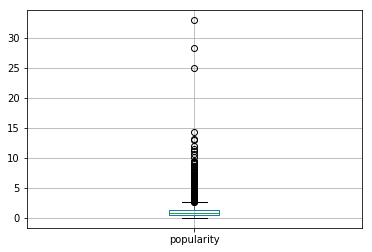

In [20]:
movie_df.boxplot(column=['popularity'])

### How Do Popularity and Score Affect Revenue?

In [13]:
#In this cell, I am going to explore how revenue is correlated with popularity and score.
corr_pop_rev = movie_df['popularity'].corr(movie_df['revenue_adj'])
corr_score_rev = movie_df['vote_average'].corr(movie_df['revenue_adj'])

In [14]:
#Now I will print out the results of the work in the previous cell.
print("The correlation between popularity and adjusted revenue is: ", round(corr_pop_rev,4))
print("The correlation between average score and adjusted revenue is: ", round(corr_score_rev,4))

The correlation between popularity and adjusted revenue is:  0.547
The correlation between average score and adjusted revenue is:  0.267


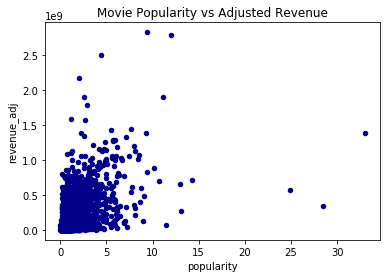

In [15]:
#Now I am going to draw a scatterplot using popularity and adjusted revenue.

movie_df.plot.scatter(x='popularity',
                y='revenue_adj',
                c='DarkBlue', title='Movie Popularity vs Adjusted Revenue')

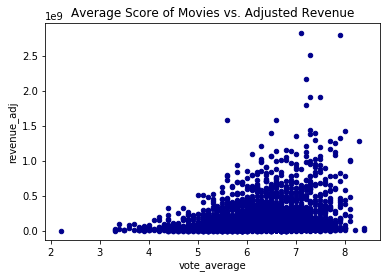

In [16]:
#Now I am going to draw a scatterplot using average score and adjusted revenue.

movie_df.plot.scatter(x='vote_average',
                y='revenue_adj',
                c='DarkBlue', title='Average Score of Movies vs. Adjusted Revenue')

<a id='conclusions'></a>
## Conclusions

In conclusion, we now have average popularity and scores of action, fantasy, crime, thriller, adventure and science-fiction movies to compare! It turns out that adventure movies have the highest popularity, while crime movies have the highest score. Thriller movies are the least popular, while science-fiction movies get the worst scores.

When it comes to popularity, score, and revenue, it looks like popularity has much more to do with revenue than score! Although when looking at the scatterplots, it looks like there might be an exponential relationship between adjusted revenue and score, and a weak positive relationship between popularity and score.

I believe that the sample size of around 10,000 movies is a good enough one to represent the population. In fact, using .info(), I was able to tell that there were still over 10,000 movies for each category, even without counting the null values.